In [ ]:
!pip install jupyter_contrib_nbextensions

# and successively:

!jupyter nbconvert Bell-Problem1.ipynb --to slides --post serve

# Week 1 Workshop 

### <u> Task 1 - Plot U(r) and f(r) </u>

In [503]:
import numpy as npy
import scipy as spy
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import fsolve

In [504]:
kB = 1.381e-23 # /J
T = 2000 # /K
epsilon = 10.22*kB # /J         
sigma = 2.56e-10 # for He in m
kT = kB*T 
Na = 6.022e23 # avagadros number
R = 8.314

In [505]:
def U(r):
     return 4*epsilon*((sigma/(r+1e-30))**12-(sigma/(r+1e-30))**6)
    
def f(r):
    return (1-npy.exp(-U(r)/kT))*((r+1e-30)**2)

def B2(r):
    return 2*npy.pi*Na*f(r) #defining B2(r) for later tasks

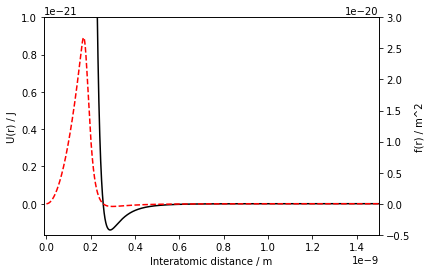

In [506]:
r = npy.linspace(0,20e-10,20001) # generating the x -values
Uplot = plt.plot(r,U(r), color = 'black') # plotting U(r)
plt.xlim(-1e-11,15e-10)  # setting r limits to the bounds of the data
plt.ylim(-1.67e-22,1e-21) # setting U(r)'s limits to see its profile better
plt.xlabel('Interatomic distance / m')
plt.ylabel('U(r) / J')

plt.twinx() # plotting U(r) and f(r) on the same graph

fplot = plt.plot(r,f(r), color = 'red', linestyle = 'dashed')
plt.ylim(-0.5e-20,3e-20) # setting f(r)'s limits to see its profile better
plt.ylabel('f(r) / m^2')
plt.show()


### <u> Task 2 - Calculating B2 using the direct Monte Carlo method </u>

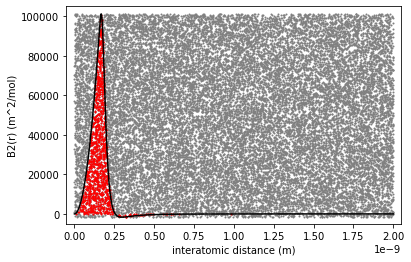

In [507]:
n = 25000 # number of points
rlim1 = 0 
rlim2 = 20e-10 # r limits

ymax = npy.max(B2(r)) # obtaining y limits from B2(r) function
ymin = npy.min(B2(r))

s = 0 # starting counter for number of points under curve

A = (rlim2 - rlim1)*(ymax-ymin) # total area of the plotted points

rxcoords = list() # creating lists of data co-ords for all data, as well as data below curve (puc) 
rycoords = list()
puc_xcoord = list()
puc_ycoord = list()

for i in range(n):
    Rx = (rlim2 - rlim1)*npy.random.rand() + rlim1 
    rxcoords.append(Rx)
    Ry = (ymax-ymin)*npy.random.rand() + ymin
    rycoords.append(Ry) # creating data x and y coords and adding it to lists
    
    if Ry <= B2(Rx) and Ry >= 0: # adding data to puc list if it is under the curve, whilst counting the number of points under the curve
        s = s + 1
        puc_xcoord.append(Rx)
        puc_ycoord.append(Ry)
    if Ry >= B2(Rx) and Ry <= 0:
        s = s + 1
        puc_xcoord.append(Rx)
        puc_ycoord.append(Ry)
        
A_under_curve = A*(s/n) # calculating the area under the curve based on the ratio of points

plt.scatter(rxcoords, rycoords, 1, color = 'grey')
plt.scatter(puc_xcoord, puc_ycoord, 1, color = 'red' ) # creating a scatter graph of the points and highlighting those under the curve for easier visualisation
plt.plot(r, B2(r), color = 'black')
plt.ylim(-0.5e4,10.5e4)
plt.xlim(-0.5e-10,20.5e-10)
plt.ylabel('B2(r) (m^2/mol)')
plt.xlabel('interatomic distance (m)')
plt.show()
B2_value = A_under_curve
B2_cm3 = B2_value*1e6 # convert value into cm^3/mol instead of m^3/mol

In [508]:
print("The value obtained for B2 using the Monte Carlo method is \033[1m" + str(format(B2_cm3,'.1f')) + " cm^3/mol\033[0m.")

The value obtained for B2 using the Monte Carlo method is 9.1 cm^3/mol.


### <u> Task 3 - Checking my results using numerical integration with scipy </u>

In [509]:
int_lim = fsolve(B2,2e-10)             
B2Na = integrate.quad(B2, 0, int_lim) # finds the area of the curve above and below the x axis seperately as otherwise would subtract them
B2Nb = integrate.quad(B2, int_lim, 20e-10)
B2_int = B2Na[0] - B2Nb[0]
B2_int_cm3 = B2_int*1e6 # converts value into cm^3/mol from m^3/mol


In [510]:
print("The value of B2 obtained using the direct Monte Carlo method (\033[1m" + str(format(B2_cm3,'.1f')) + " cm^3/mol\033[0m) is very similar to the value " + 
      "obtained using     direct integration, which is \033[1m" + str(format(B2_int_cm3,'.1f')) + " cm^3/mol\033[0m. The slight deviation is caused by "
      "the random nature of the point plotting of the  Monte Carlo method. To reduce this the number of points (n) should be increased.")

The value of B2 obtained using the direct Monte Carlo method (9.1 cm^3/mol) is very similar to the value obtained using     direct integration, which is 9.3 cm^3/mol. The slight deviation is caused by the random nature of the point plotting of the  Monte Carlo method. To reduce this the number of points (n) should be increased.


### <u> Task 4 - Checking my results against the literature </u>

In [511]:
print("The value obtained of \033[1m" + str(format(B2_cm3,'.1f')) + " cm^3/mol\033[0m compares well to the expected value of \033[1m8.74 cm^3/mol \033[0m."
      " Whilst some of this deviation     may be caused by the randomness of the direct monte carlo method, it is likely that it is "
      "mainly due to slight differences  in the values used, such as rounding error. I have come to this conclusion as the integration method is also "
      "contains this  small offset." )
print("Reference: Hutem and Boonchui. 2012. Journal of Mathematical Chemistry. 50(5), pp.1262–1276.")

The value obtained of 9.1 cm^3/mol compares well to the expected value of 8.74 cm^3/mol . Whilst some of this deviation     may be caused by the randomness of the direct monte carlo method, it is likely that it is mainly due to slight differences  in the values used, such as rounding error. I have come to this conclusion as the integration method is also contains this  small offset.
Reference: Hutem and Boonchui. 2012. Journal of Mathematical Chemistry. 50(5), pp.1262–1276.


### <u> Task 5 - Discussing what accuracy is affected by </u>

For the monte carlo method, the number of points used determines the accuracy obtained as when n increases the ratio of points under the curve compared to above to curve tends closer to the actual value. This means with lower values of n there will be a wider uncertainity due to the point plotting being random. To a smaller amount, the bounds of the calculation also effect the final value as although the area is small after 2e-10, it is not at x=0 so there is some area that has not been calculated.

### <u> Task 6 - Calculating the molar volume of He using B2 and the ideal gas equation </u>

In [512]:
def molar_vol(T,p):
    return (R*T/p) # defining the molar volume for the ideal gas equation

In [513]:
mol_vol_ideal = molar_vol(600,6e7) # calculating molar vol using the ideal gas equation
mvi_cm3 = mol_vol_ideal*1e6 # converting to cm^3

In [514]:
def molar_vol_virial(T,p,B2_T):
    return (R*T/(p*2))*(1+(1+4*B2_T*p/(R*T))**0.5) # equation for molar volume derived using the quadratic equation

In [515]:
mol_vol_B2 = molar_vol_virial(600,6e7,10.57e-6) # B2 = 10.57 for T = 600K (from previous reference)
mvB_cm3 = mol_vol_B2*1e6 # converting to cm^3

In [516]:
print("Using the ideal gas equation, the molar volume was calculated to be \033[1m" + str(format(mvi_cm3, '.1f')) +
      " cm^3/mol\033[0m. Using the virial equation, the molar     volume was calculated to be \033[1m" + str(format(mvB_cm3, '.1f')) +
     " cm^3/mol\033[0m. This increase in the molar volume was expected, and is due to the inclusion of   the B2 term responsible for the interactions between molecules. " +
      "For high pressures (like calculated) the effect of repulsion between particles has a noticable effect, reducing the pressure compared" +
      " to the ideal equation, therefore increasing the    molar volume.")

Using the ideal gas equation, the molar volume was calculated to be 83.1 cm^3/mol. Using the virial equation, the molar     volume was calculated to be 92.6 cm^3/mol. This increase in the molar volume was expected, and is due to the inclusion of   the B2 term responsible for the interactions between molecules. For high pressures (like calculated) the effect of repulsion between particles has a noticable effect, reducing the pressure compared to the ideal equation, therefore increasing the    molar volume.


### <u> Task 7 - How B2 can be derived from statistical mechanics </u>

All thermodynamic properties can be defined by the canonical partition function Q, which itself can be defined as QN = ZN/ Λ^3N where Z is the configurational integral providing the information of the system, and Λ is the thermal De Brogile wavelength and Λ^3N is the spacing of the particles in 3 dimensions. This can therefore be subsituted into the definition of pressure (p = kT d(lnQN)/dV) ) and derive the equation for B2 by rearranging the virial equation (pV/nRT = 1 + B2*n/V + .....). 

### <u> Task 9 - Reflection of work </u>

Task 1 - The plots of U(r) and f(r) were plotted successfully on the same graph whilst still showing their respective features 0.5/0.5 mark

Task 2 - A value of B2 was calculated using the Monte Carlo method in an efficient manner whilst also plotting a graph for visualisation 2/2 marks.

Task 3 - Numerical integration was used to calculate a vaue for B2, in just 5 lines, which was then compared to the once obtained using the Monte Carlo method, these values were very similar and reasons were provided for the slight deviation 1/1 mark.

Task 4 - A reliable source was found and the value of B2 was compared to it using the same values, there was a deviation of 4%, however reasons were provided for this 0.5/0.5 mark.

Task 5 - 2 points which affect the accuracy were provided 1/1 mark.

Task 6 - Values for the molar volumes using each equation were calculated and the background to why there was a difference (which was expected) was explained 1/1 mark.

Task 7 - A superficial description of how quantum mechanics can be used to derive B2 was given 0.5/1 mark.

Task 8 - Coloured graphs were used and code was annotated, reasonings for values obtained were and those values obtained were of a high accuracy 1.5/2 marks.

Task 9 - An extra graph was plotted for the direct Monte Carlo method to help illustrate the mathematics. Details of possible differences or reasons for deviations were also provided 0.5/1 mark.

TOTAL = 8.5/10 marks